# Optimization with JuMP

Optimization models play a central role in operations research. 

In this session, we will explore the basic functionalities of JuMP, a modeling language to define and solve optimization models in Julia.

In the first part, we will introduce the basics of implementating optimization in JuMP.
In the second part, we will demonstrate its application via a case study the process from modeling the problem, implementing with data, to running experiment analysis.

<a href="https://github.com/JuliaOpt/JuMP.jl"><img src="figures/jump.svg" alt="Julia" style="width: 500px;"/></a>

## Part I: Brief introduction

[JuMP.jl](https://github.com/JuliaOpt/JuMP.jl) is a high-level modeling language for mathematical optimization embedded in Julia. It currently supports 
- a number of open-source and commercial solvers (Artelys Knitro, BARON, Bonmin, Cbc, Clp, Couenne, CPLEX, ECOS, FICO Xpress, GLPK, Gurobi, Ipopt, MOSEK, NLopt, SCS) 
- for a variety of problem classes, including linear programming, (mixed) integer programming, second-order conic programming, semidefinite programming, and nonlinear programming.

<a href="http://www.juliaopt.org"><img src="figures/juliaopt.png" alt="JuliaOpt" style="width: 1000px;"/></a>

## A toy example

Consider the following (small) problem:

\begin{align*}
    \max\:& x + y + z_{11} + z_{12} + z_{13}  \\
    \text{s.t.}\:& x + 2y \leq 1.5 \\
    & -y + z_{ij} \leq 1, \forall i \in \{1,2\}, j \in \{1,2,3\} \\
     & z_{ij} \geq 0, \forall i \in \{1,2\}, j \in \{1,2,3\}\\
    & x \in \{0,1\}, y \in \mathbb{Z} \\
\end{align*}


# Implementation in JuMP

Let's solve our simple problem in JuMP.

In [1]:
using JuMP, Gurobi
m = Model(Gurobi.Optimizer)

@variable(m, x, Bin)
@variable(m, y, Int)
@variable(m, z[1:2,1:3]>=0)

@constraint(m, x + 2y <= 1.5)
@constraint(m, z .-y .<= 1)

@objective(m, Max, x + y + sum(z[1,:]))

print(m)

Academic license - for non-commercial use only
Max x + y + z[1,1] + z[1,2] + z[1,3]
Subject to
 x + 2 y ≤ 1.5
 -y + z[1,1] ≤ 1.0
 -y + z[2,1] ≤ 1.0
 -y + z[1,2] ≤ 1.0
 -y + z[2,2] ≤ 1.0
 -y + z[1,3] ≤ 1.0
 -y + z[2,3] ≤ 1.0
 z[1,1] ≥ 0.0
 z[2,1] ≥ 0.0
 z[1,2] ≥ 0.0
 z[2,2] ≥ 0.0
 z[1,3] ≥ 0.0
 z[2,3] ≥ 0.0
 y integer
 x binary


and solve it

In [2]:
optimize!(m)

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 7 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xd6cb8957
Variable types: 6 continuous, 2 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 4.0000000
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 4 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+00, best bound 4.000000000000e+00, gap 0.0000%

User-callback calls 33, time in user-callback 0.00 sec


In [3]:
mio_obj = objective_value(m)                                                       


4.0

In [4]:
z_val = value.(z)


2×3 Array{Float64,2}:
 1.0  1.0  1.0
 0.0  0.0  0.0

In [5]:
println(value(x))
println(value(y))
println(solve_time(m))

1.0
0.0
0.0005650520324707031


# Solver parameters: Should you bother?

Gurobi (and other high-quality solvers) allow you to tweak a wide range of different parameters; _sometimes_ tuning these can drastically improve performance. It can be kind of intimidating, though: Gurobi has over 100 parameters, so which are the important ones?

Some useful ones:

* ``TimeLimit``: How long the solver will run before giving up.
* ``NodeLimit``: How many nodes to explore before giving up.
* ``MIPGap``: Termination criterion for relative gap $\frac{UB-LB}{LB}$.
* ``MIPFocus``: High-level controls on solver priority (proving optimality or increasing bound or finding optimal solution).
* ``Heuristics``: Determines the amount of time spent in MIP heuristics.
* ``Cuts``: Controls the aggressiveness of cut generation.
* ``Presolve``: Controls the presolve level (conservative or aggressive).

Is that it? Well, no, but you probably need domain knowledge about your problem to go much further. There's an alternative: Gurobi has a parameter tuning feature you can try to "learn" good parameter settings for a particular model. Try it out if you aren't quite happy with your performance.

## Where to get help
- JuMP docs https://www.juliaopt.org/JuMP.jl/v0.20.0/
- JuMP issues https://github.com/JuliaOpt/JuMP.jl/issues
- JuMP tutorial notebooks package https://github.com/JuliaOpt/JuMPTutorials.jl
- Discourse https://discourse.julialang.org/c/domain/opt
- Julia slack channels https://app.slack.com/client/T68168MUP/C66NPKCQZ/thread/C681S52FQ-1577546443.051000 
- JuMP style guide https://www.juliaopt.org/JuMP.jl/dev/style/
- Examples in the JuMP Github repo https://github.com/JuliaOpt/JuMP.jl/tree/master/examples

Acknowledgement: The material in part one is developed upon courses materials by Lea Kapelevich in 2020 and by Jean Pauphilet in 2019.

## Part II: Case study: a medical scheduling problem

1. Model the optimization problem
2. Load data and parameters
3. Implement and solve the problem in JuMP
4. Analyze model outputs

## 1. Model the optimization problem:
For each provider team, visit type (in-person/telehealth), session, and day for a month…
	schedule the number of (a) provider hours, (b)  patients scheduled, and (c) patients waitlisted 
    
Maximize the total visits achieved in one month (28 days)

Satisfy a set of scheduling constraints



## Variables:

$z_{qjid}$: number of provider hours of type $q$ assigned to visits of type $j$ on shift $i$ of day $d$

$x_{qjid}$: number of patients scheduled to see providers of type $q$ for visits of type $j$ on shift $i$ of day $d$ 

$w_{qjid}$: number of patients waitlisted to see providers of type $q$ for visits of type $j$ on shift $i$ of day $d$ 


## Constraints:
Variable range:
  $x_{qjid}, w_{qjid} \in \mathbb{Z^+},z_{qjid}\geq 0, \quad \forall q,j,i,d$

Maximum visits per provider hour: 
$x_{qjid}  \leq C_{q} \cdot z_{qjid},\quad \forall q,j,i,d$

Capacity for patient waitlist:
$w \leq x$

Capacity through the main entrance: 
$\sum\limits_{q \in [Q], j \in J_{in-person}} x_{qjid}  \leq C_{\max},\quad \forall i,d$

Max inperson visits in each team per session:
$x_{qjid}  \leq C_{inperson}^j,\quad \forall q,i,d, j \in J_{in-person}$

Visit types not eligible or available for providers:
$z_{qjid} = 0, \quad \forall (q,j) \in N_P, i \in [I], d \in [D]$

Number of provider hours available for each shift:
$\sum\limits_{j} z_{qjid}  \leq (1-\alpha_{q}) E_{qid} H_q, \quad \forall q, i,d$

Bound on maximum number of providers' weekly working hours:
$\sum\limits_{d \in Dw_w, j \in [J], i \in [I]} z_{qjid} H_q \leq \overline{Tn_\max^q}, \quad \forall q,w$

Bound on maximum visits for each provider team per month:
$\sum\limits_{d \in [D], j \in [J], i \in [I]} z_{qjid} \leq \overline{Vn_\max^q} , \quad \forall q$


## Objective:
$\max \quad \sum\limits_{q,j,i,d} \min\{x_{qjid}, (1-\beta_{q}) x_{qjid} + (1-\gamma_{q}) w_{qjid}\}$

## 2. Load data and parameters

In [6]:
# using Pkg
# Pkg.add("CSV")
# Pkg.add("DataFrames")
# Pkg.add("Plots")
# Pkg.add("Statistics")
using CSV
using DataFrames
using Plots
#using Statistics

In [7]:
## sizes
Q = 8  # provider teams
J = 2 # visits types: inperson, remote
D = 28 #days
D_kend = [6,7,13,14,20,21,27,28] # set of weekend days
I = 3 # morning, afternoon, evening shifts
W = 4 # weeks
Dw = [1:7,8:14,15:21,22:28] # days of each week

4-element Array{UnitRange{Int64},1}:
 1:7
 8:14
 15:21
 22:28

In [8]:
# #generate data 
# using Random
# Random.seed!(1)
# Cq = 1.5 .+ rand(Q)
# alpha = 0.05 .+ 0.05 .* rand(Q)
# beta = 0.05 .+ 0.05 .* rand(Q)
# gamma = 0.05 .+ 0.05 .* rand(Q)
# C_inperson = 50 .+ 100 .* rand(Q)
# Tn_max = 400 .+ 200 .* rand(Q)
# Vn_max = 1000 .+ 200 .* rand(Q)
# H = 3 .+ rand(Q)
# data_byteam = hcat(1:Q,Cq,alpha,beta,gamma,C_inperson,Tn_max,Vn_max)
# data_byteam = DataFrame(data_byteam)
# CSV.write("data/data_byteam.csv",data_byteam)

In [9]:
data = CSV.read("data/data_byteam.csv",DataFrame)

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,1.73603,0.0625831,0.062569,0.0875656,61.1981,474.194,1048.32
2,2.0,1.84652,0.0993333,0.0510187,0.0822442,147.631,578.833,1176.97
3,3.0,1.81271,0.0777876,0.0643851,0.0538913,55.1615,529.611,1088.18
4,4.0,1.50791,0.0718554,0.0929756,0.0924093,103.803,483.408,1080.93
5,5.0,1.98861,0.0712359,0.0538475,0.0542818,95.5692,428.913,1147.36
6,6.0,1.71097,0.0886612,0.0820198,0.0776603,77.9395,524.481,1190.76
7,7.0,2.45192,0.0640595,0.0936772,0.0731675,67.8246,574.467,1019.04
8,8.0,2.4999,0.0604736,0.0639291,0.0592911,104.898,504.995,1103.94


In [10]:
Cq = data[:,2] #Maximum visits per provider hour
alpha = data[:,3] # provider cancellation rate
beta = data[:,4] # patient no show rate
gamma = data[:,5]# patient no show rate (for those waitlisted)
C_inperson = data[:,6] # max inperson visits in each team per session 
Tn_max = data[:,7] # weekly working hours
Vn_max = data[:,8]; # monthly max visits

In [11]:
E = 4 .* ones(Q,I,D);
#E .+ rand(-1:4,Q,I,D)
C_max = 40
J_inperson = [1]  #set of appointment types j that are in-person
wl_bool = false 
evening_bool = false #true 
weekend_bool = false #true 
H =3.5*ones(Q)

8-element Array{Float64,1}:
 3.5
 3.5
 3.5
 3.5
 3.5
 3.5
 3.5
 3.5

## 3.Implement and solve the problem in JuMP

In [12]:
miotol = 1e-2
function mio(wl_bool,evening_bool,weekend_bool,Cq,alpha,beta,gamma,C_inperson,C_max,Tn_max,Vn_max,H,E)
    m = Model(Gurobi.Optimizer)
    set_optimizer_attribute(m, "OutputFlag", 0)
    set_optimizer_attribute(m, "MIPGap", miotol)
    @variable(m, z[1:Q,1:J,1:I,1:D] >= 0)
    @variable(m, x[1:Q,1:J,1:I,1:D] >= 0,Int)
    @variable(m, w[1:Q,1:J,1:I,1:D] >= 0,Int)

    for i in 1:I, d in 1:D
        @constraint(m,sum(x[q,j,i,d] for q in vcat(1:3,8) for j in J_inperson) <= C_max*3.5) # capacity main door
        for q in 1:Q, j in 1:J                
            @constraint(m,x[q,j,i,d] <= z[q,j,i,d] * Cq[q]) # Maximum visits per provider hour
            @constraint(m,w[q,j,i,d] <= x[q,j,i,d]) # capacity for waitlist 
        end
        for q in 1:Q
            @constraint(m, sum(z[q,j,i,d] for j in 1:J) <= (1-alpha[q]) * E[q,i,d] * H[q]) # availability #
            @constraint(m,x[q,1,i,d] <=C_inperson[q]) # max inperson visits in each team per session  
        end
    end                                                                                                                                
    @constraint(m,z[8,2,:,:] .== 0)     # walk in center
    @constraint(m,z[7,1,:,:] .== 0)     # telehealth                                              
    for w in 1:W, q in 1:Q
       @constraint(m, sum(z[q,j,i,d]*H[q] for j in 1:J for i in 1:I for d in Dw[w]) <= Tn_max[q]) # Bounds on total number of nurses’ weekly working hours:
    end
    for q in 1:Q                              
        @constraint(m, sum(z[q,j,i,d] for j in 1:J for i in 1:I for d in 1:D) <= Vn_max[q]) # expected visits per month
    end                                                            
    # if no evening / weekend; if no waitlist : set to zero
    if wl_bool == false
        @constraint(m, w .== 0)
    end 
    if evening_bool == false
        @constraint(m, z[:,:,3,:] .== 0)
    end 
    if weekend_bool == false
        @constraint(m, z[:,:,:,D_kend] .== 0)
    end 
    # objective
    @variable(m,nvisits[1:Q,1:J,1:I,1:D] >= 0,Int)
    for i in 1:I, j in 1:J, d in 1:D, q in 1:Q 
        @constraint(m, nvisits[q,j,i,d] <= x[q,j,i,d] ) # scheduled
        @constraint(m, nvisits[q,j,i,d] <= ((1-beta[q])*x[q,j,i,d] + (1-gamma[q]) *w[q,j,i,d])) # patient show up 
    end
    @objective(m,Max, sum(nvisits))
    optimize!(m)
    mio_obj = objective_value(m)                                                       
    z_val = value.(z)
    x_val = value.(x)
    w_val = value.(w)
    nvisits_val = value.(nvisits)
    nvisit_obj = sum(nvisits_val) 
    soltime = solve_time(m)
#     println(sum(z_val))
#     println(sum(x_val))
#     println(sum(w_val))
    return mio_obj,nvisit_obj,z_val,x_val,w_val,nvisits_val,soltime
end

mio (generic function with 1 method)

In [13]:
#Current scenario
mio_obj,nvisit_obj_cur,z_val,x_val,w_val,nvisits_val,soltime = mio(wl_bool,evening_bool,weekend_bool,Cq,alpha,beta,gamma,C_inperson,C_max,Tn_max,Vn_max,H,E);
nvisit_obj_cur

Academic license - for non-commercial use only


7131.0

## 4. Analyze model outputs

In [14]:
nvisits_qj = zeros(Q,J)
for q in 1:Q, j in 1:J
 nvisits_qj[q,j] = sum(nvisits_val[q,j,:,:])
end
nvisits_qj

8×2 Array{Float64,2}:
  800.0     0.0
  840.0     0.0
  840.0     0.0
  680.0     0.0
  293.0   598.0
  760.0     0.0
    0.0  1160.0
 1160.0     0.0

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


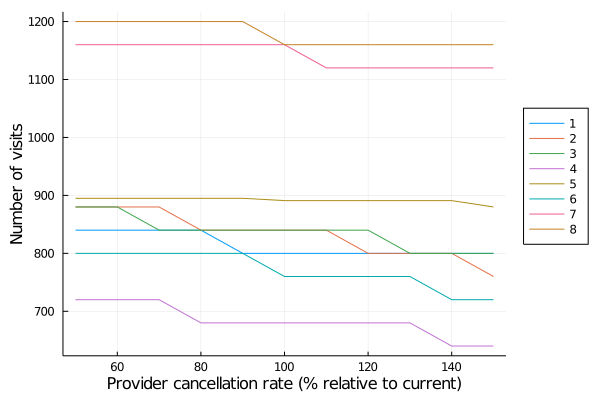

In [15]:
delta_list = range(0.5,stop=1.5,length=11)
all_delta = zeros(Q+1,11)
for i in 1:11
    mio_obj,nvisit_obj,z_val,x_val,w_val,nvisits_val,soltime = mio(wl_bool,evening_bool,weekend_bool,Cq,alpha.*delta_list[i],beta,gamma,C_inperson,C_max,Tn_max,Vn_max,H,E);
    all_delta[1,i] = nvisit_obj
    for q in 1:Q
        all_delta[q+1,i] = sum(nvisits_val[q,:,:,:])
    end
end
plot(delta_list.*100,all_delta[2,:],label=1,legend=:outerright,xlabel="Provider cancellation rate (% relative to current)",ylabel="Number of visits") 
for q in 2:Q
    plot!(delta_list.*100,all_delta[q+1,:],label=q)
end
current()
# telehealth team most impact 

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


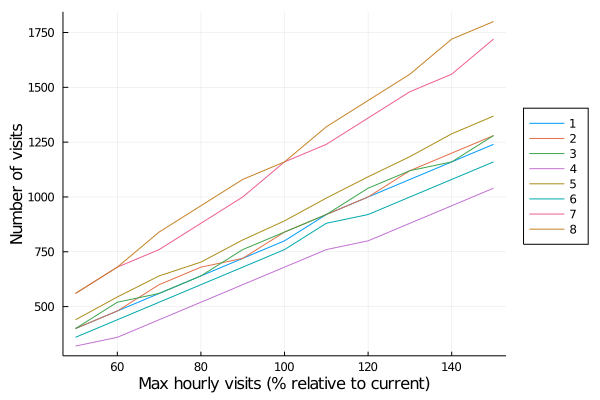

In [16]:
# average # visits per hour
delta_list = range(0.5,stop=1.5,length=11)
all_delta = zeros(Q+1,11)
for i in 1:11
    mio_obj,nvisit_obj,z_val,x_val,w_val,nvisits_val,soltime = mio(wl_bool,evening_bool,weekend_bool,Cq.*delta_list[i],alpha,beta,gamma,C_inperson,C_max,Tn_max,Vn_max,H,E);
    all_delta[1,i] = nvisit_obj
    for q in 1:Q
        all_delta[q+1,i] = sum(nvisits_val[q,:,:,:])
    end
end
plot(delta_list.*100,all_delta[2,:],label=1,legend=:outerright,xlabel="Max hourly visits (% relative to current)",ylabel="Number of visits") #,title="Number of visits vs main entrance capacity")
for q in 2:Q
    plot!(delta_list.*100,all_delta[q+1,:],label=q)
end
current()
# shorten visit duration

Exercise: pick two oher constraints to perturbate and evaluate how each of them affects the outcome

In [17]:
# evaluate outcome if adding a waitlist 
mio_obj,nvisit_obj,z_val,x_val,w_val,nvisits_val,soltime = mio(true,evening_bool,weekend_bool,Cq,alpha,beta,gamma,C_inperson,C_max,Tn_max,Vn_max,H,E);
println(nvisit_obj)
nvisit_obj / nvisit_obj_cur - 1

Academic license - for non-commercial use only
7852.0


0.1011078390127611

Exercise: try to evaluate the outcome if adding evening hours or weekend hours 

Acknowledgement: The material in part two is developed by Irra Na with reference to a model from Healthcare Lab using synthetic data.